In [13]:
import joblib
from pathlib import Path
import numpy as np 
from matplotlib import pyplot as plt 
import atlas_mpl_style as ampl
from uncertainties import ufloat, unumpy
#ampl.use_atlas_style(usetex=False)
import mplhep as hep
hep.style.use("ATLAS")


bin_edges = label_ptrange
import random
inxx = 0

label_ptrange = [500, 600, 800, 1000, 1200, 1500, 2000]

In [62]:
pkl_path = '/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/note_plots'
pkl_path = Path(pkl_path)
nominal_path = pkl_path / 'nominal' / 'plots' / 'ADE' / 'Extraction_Results'

reweighting_vars = ['jet_nTracks', 'GBDT_newScore']
dicc = {}

# for i_var in reweighting_vars:
#     dicc[i_var]={}

#     nominal_SFs = joblib.load(nominal_path / f'{i_var}_Extraction_Results.pkl' ) 
#     fraction_pt_slices = []
#     for pt in label_ptrange[:-1]:
#         fraction_pt_slices.append(nominal_SFs[f'{i_var}'][pt]['f'])
#     dicc[i_var] = fraction_pt_slices  



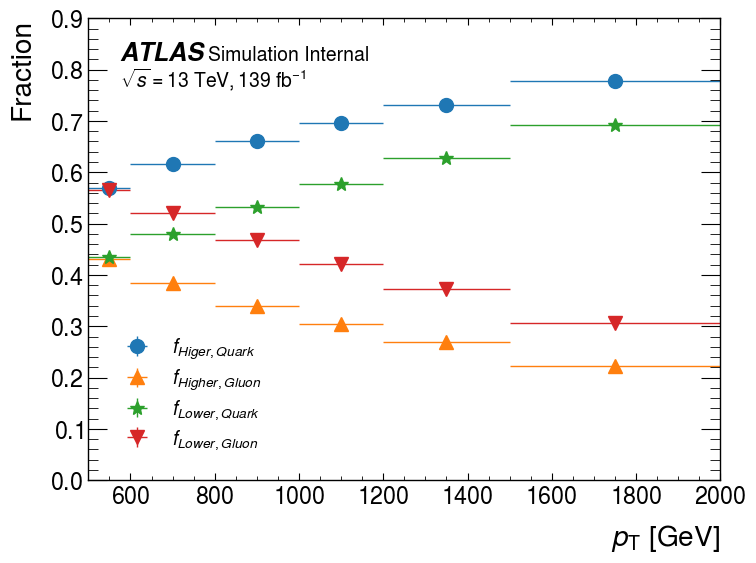

In [63]:
nominal_SFs = joblib.load(nominal_path / 'none_Extraction_Results.pkl' ) 
fraction_pt_slices = []
for pt in label_ptrange[:-1]:
        fraction_pt_slices.append(nominal_SFs['jet_nTracks'][pt]['f'])
dicc[i_var] = fraction_pt_slices  

for rew,v1 in dicc.items():
        fig, ax = plt.subplots()
        fraction_pt_slices = np.array(v1)
        fractions = fraction_pt_slices.reshape((6, 4)).swapaxes(0,1)
        frac_Forward_Quark = fractions[0, :]
        frac_Forward_Gluon = fractions[1, :]
        frac_Central_Quark = fractions[2, :]
        frac_Central_Gluon = fractions[3, :]

        hep.histplot(unumpy.nominal_values(frac_Forward_Quark), bin_edges, label=r"$f_{Higer, Quark}$",ax=ax,histtype='errorbar',marker="o",xerr=True,yerr=unumpy.std_devs(frac_Forward_Quark))
        hep.histplot(unumpy.nominal_values(frac_Forward_Gluon), bin_edges, label=r"$f_{Higher, Gluon}$",ax=ax,histtype='errorbar',marker="^",xerr=True,yerr=unumpy.std_devs(frac_Forward_Gluon))
        hep.histplot(unumpy.nominal_values(frac_Central_Quark), bin_edges, label=r"$f_{Lower, Quark}$",ax=ax,histtype='errorbar',marker="*",xerr=True,yerr=unumpy.std_devs(frac_Central_Quark))
        hep.histplot(unumpy.nominal_values(frac_Central_Gluon), bin_edges, label=r"$f_{Lower, Gluon}$ ",ax=ax,histtype='errorbar',marker="v",xerr=True,yerr=unumpy.std_devs(frac_Central_Gluon))

        ax.legend()
        ax.set_xlim(bin_edges[0], bin_edges[-1])
        ax.set_ylim(0,0.9)
        #hep.plot.yscale_legend()
        ax.set_xlabel('$p_{\mathrm{T}}$ [GeV]')
        ax.set_ylabel('Fraction')
        hep.atlas.label(label="Internal",ax=ax,lumi=139)
        #hep.atlas.text(text=r"Pythia8 dijet Anti-$k_{\mathrm{T}}$ $R$ = 0.4 PFlow")
        fig_name = f'/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/frac/Fraction_none_pythia.pdf'
        fig.savefig(fig_name)

In [15]:
systlist =['powhegpythia']#['herwigangle','herwigdipole'] #['sherpa','sherpalund']#['powhegpythia']#['sherpa','sherpalund'] #
herwig_SFs={}
reweighting_vars = ['jet_nTracks', 'GBDT_newScore']
dicc = {}

for i_var in reweighting_vars:
    dicc[i_var]={}

    nominal_SFs = joblib.load(nominal_path / f'{i_var}_Extraction_Results.pkl' ) 

    fraction_pt_slices = []
    for pt in label_ptrange[:-1]:
        fraction_pt_slices.append(nominal_SFs[f'{i_var}'][pt]['f'])
    dicc[i_var]['pythia'] = fraction_pt_slices  

    for her in systlist: 
        herwig = pkl_path / 'matrix_element' / her / 'plots' / 'ADE' / 'Extraction_Results' 
        herwig_SFs[her] = joblib.load(herwig/ f'{i_var}_Extraction_Results.pkl' )

        fraction_pt_slices_her=[]
        for pt in label_ptrange[:-1]:
            fraction_pt_slices_her.append(herwig_SFs[her][f'{i_var}'][pt]['f']) 
        dicc[i_var][her] =fraction_pt_slices_her 


TypeError: std_devs() missing 1 required positional argument: 'arr'

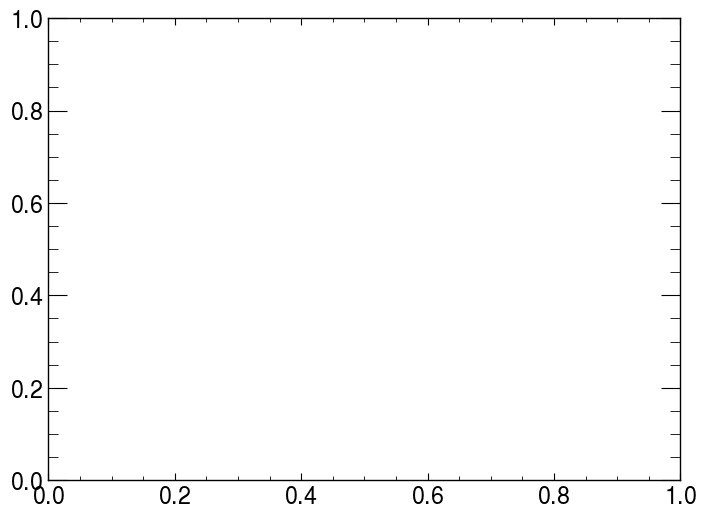

In [16]:
for rew,v1 in dicc.items():
        fig, ax = plt.subplots()
        for syst,v2 in v1.items():

                fraction_pt_slices_her = np.array(v2)
                fractions_her = fraction_pt_slices_her.reshape((6, 4)).swapaxes(0,1)
                frac_Forward_Quark_her = fractions_her[0, :]
                frac_Central_Quark_her = fractions_her[2, :]

                hep.histplot(unumpy.nominal_values(frac_Forward_Quark_her), bin_edges, label=f"H,Q {syst}",ax=ax,histtype='errorbar',marker="*",xerr=True,yerr=unumpy.std_devs())
                # ax.stairs(frac_Forward_Quark_her, bin_edges, label=f"H,Q {syst}", color=f'C{inxx}', baseline=None, linewidth = 2)
                # inxx += 1
                # ax.stairs(frac_Central_Quark_her, bin_edges, label=f"H,Q {syst}", color=f'C{inxx}', baseline=None, linewidth = 2)
                # inxx += 1
                #ax.stairs(frac_Forward_Quark, bin_edges, label=rf"$f_{Forward, Quark}$_{i_var}", color="purple", baseline=None, linewidth = 2)
                #ax.stairs(frac_Central_Quark, bin_edges, label=rf"$f_{Central, Quark}$_{i_var}", color="blue", baseline=None, linewidth = 2)
                ax.legend()
                #print(f"{rew}_{syst} Higher Quark: ",frac_Forward_Quark_her)


        #ax.hlines(y=0.5, xmin=bin_edges[0], xmax=bin_edges[-1], linestyles='dashed', color="black")
        ax.set_xlim(bin_edges[0], bin_edges[-1])
        ax.set_ylim(0,0.9)
        ax.set_xlabel('Jet $p_{\mathrm{T}}$ [GeV]')
        ax.set_ylabel('Fraction') 
        #ampl.draw_atlas_label(0.1, 0.9, ax=ax, energy="13 TeV", simulation=True)

        #fig_name = f'/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/frac/Fraction_{rew}_{syst}.pdf'
        #fig.savefig(fig_name)